# Microproyecto 2: **Clustering en la Participación de Fuerza Laboral** 🧑‍💻

**Universidad Nacional de Colombia - Sede Medellín**  
**Facultad de Minas**  
**Departamento de Ciencias de la Computación y de la Decisión**

### 👥 **Integrantes del Equipo 6** 
- Juan Castro Flórez 
- Juan Camilo Ramírez Vidales  
- Wilson Alexander Muñoz Cárdenas  

📅 **Semestre:** 02/2024  
👨‍🏫 **Profesor:** Demetrio Arturo Ovalle Carranza, Ph.D.  
📧 **Correo del profesor:** [dovalle@unal.edu.co](mailto:dovalle@unal.edu.co)  

🗂️ **Objetivo del proyecto:**  
Analizar la participación de la fuerza laboral a partir de la aplicación de algoritmos de clustering.  


In [1]:
# LIBRERIAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [2]:
male= pd.read_csv("male.csv",header=1)
female= pd.read_csv("female.csv",header=1)

In [3]:
# print(male.info())
# print(male.head())
# print(female.info())
# print(female.head())

## 1. Preprocesamiento de los datos 🔄

### Descripción inicial del dataset
Los datos proporcionados incluyen la tasa de participación de la fuerza laboral, dividida por género (masculino y femenino), para personas de 15 años en adelante. Los archivos tienen formato `.csv` y contienen información necesaria para el análisis de clustering.

### Acciones realizadas:
1. **Lectura de datos:** Se utilizó la biblioteca `pandas` para cargar los archivos CSV en DataFrames. 
2. **Inspección inicial:** Se verificó la presencia de valores nulos y se calcularon estadísticas descriptivas para identificar posibles anomalías en los datos.
3. **Mezcla aleatoria de los datos:** Se implementó la función `shuffle` de `sklearn.utils` para reorganizar los datos antes de cualquier análisis, como lo especifica el enunciado.

### Observaciones:
- Se encontraron valores nulos en ambas bases de datos, por lo cual se optó por eliminar dichas filas. Esta decisión se tomó considerando que los datos representan países con realidades muy distintas, lo que hace que imputar valores (por ejemplo, con la media) no sea representativo ni adecuado para el análisis social.
- La mezcla aleatoria garantiza que no existan sesgos derivados del orden original de los datos.

In [4]:
# Renombrar las columnas para eliminar "Unnamed"
male.columns = [col if 'Unnamed' not in str(col) else None for col in male.columns]
female.columns = [col if 'Unnamed' not in str(col) else None for col in female.columns]

# Eliminar columnas completamente NaN
male_cleaned = male.dropna(axis=1, how='all')
female_cleaned = female.dropna(axis=1, how='all')

# Eliminar filas de encabezado y la última fila con datos no deseados
male_cleaned = male_cleaned.iloc[1:-1]
female_cleaned = female_cleaned.iloc[1:-1]

# Eliminar columnas donde todos los valores sean "a"
male_cleaned = male_cleaned.loc[:, ~(male_cleaned.apply(lambda col: col.astype(str).str.strip().eq('a').all(), axis=0))]
female_cleaned = female_cleaned.loc[:, ~(female_cleaned.apply(lambda col: col.astype(str).str.strip().eq('a').all(), axis=0))]

# Eliminar la última columna sin importar su nombre
male_cleaned = male_cleaned.iloc[:, :-1]  # Todas las columnas excepto la última
female_cleaned = female_cleaned.iloc[:, :-1]  # Todas las columnas excepto la última

# Eliminar filas a partir del índice 193 (fila 194 en términos humanos)
male_cleaned = male_cleaned.iloc[:193]  # Mantener solo hasta la fila 193
female_cleaned = female_cleaned.iloc[:193]  # Mantener solo hasta la fila 193

# Eliminar la primera columna (columna 0) de ambos DataFrames
male_cleaned = male_cleaned.iloc[:, 1:]  # Todas las columnas excepto la primera
female_cleaned = female_cleaned.iloc[:, 1:]  # Todas las columnas excepto la primera

# Reemplazar ".." por NaN en ambos DataFrames
male_cleaned.replace("..", np.nan, inplace=True)
female_cleaned.replace("..", np.nan, inplace=True)

# Eliminar filas con valores NaN
male_cleaned.dropna(inplace=True)
female_cleaned.dropna(inplace=True)

# Convertir columnas numéricas a float (excluyendo la columna 'Country')
for col in male_cleaned.columns[1:]:  # Desde la segunda columna en adelante
    male_cleaned[col] = male_cleaned[col].astype(float)

for col in female_cleaned.columns[1:]:  # Desde la segunda columna en adelante
    female_cleaned[col] = female_cleaned[col].astype(float)

## 2. Análisis Exploratorio de los Datos 🕵️‍♂️

### Descripción general
Se llevó a cabo un análisis inicial de los datos para comprender su estructura, distribución y posibles patrones. Este análisis incluyó:

- **Visualización de distribuciones:** Se generaron histogramas y diagramas de caja para explorar la distribución de las variables y detectar valores atípicos.
- **Correlaciones:** Se calcularon matrices de correlación para identificar relaciones significativas entre las variables del conjunto de datos.
- **Diferencias por género:** Se compararon estadísticas descriptivas entre las tasas de participación laboral masculina y femenina para identificar disparidades o similitudes notables.

### Observaciones clave:
1. **Distribuciones:** Las tasas de participación laboral mostraron distribuciones heterogéneas entre países, con algunos exhibiendo valores significativamente más altos o bajos.
2. **Relaciones:** Se identificaron correlaciones entre ciertas variables que sugieren patrones comunes en la fuerza laboral a nivel regional.
3. **Disparidades de género:** En muchos casos, las tasas de participación laboral masculina eran consistentemente más altas que las femeninas, aunque algunos países mostraron una brecha significativamente menor.



In [5]:
# Estadísticas descriptivas
print("\n===== Estadísticas Descriptivas (Male) =====")
print(male_cleaned.describe())
print("\n===== Estadísticas Descriptivas (Female) =====")
print(female_cleaned.describe())


===== Estadísticas Descriptivas (Male) =====
             1990        1995        2000        2005        2010       2011  \
count  181.000000  181.000000  181.000000  181.000000  181.000000  181.00000   
mean    76.433149   75.681768   74.631492   73.732597   73.022099   72.91547   
std      8.388193    8.505544    8.574915    8.733282    9.090744    9.08978   
min     42.200000   43.100000   42.600000   40.800000   40.400000   39.80000   
25%     71.200000   70.200000   69.100000   67.600000   67.300000   67.50000   
50%     76.900000   76.200000   75.000000   74.600000   73.800000   73.10000   
75%     82.000000   81.800000   80.700000   80.100000   79.500000   79.40000   
max     94.200000   94.600000   92.500000   94.000000   95.800000   94.60000   

             2012        2013        2014        2015        2016        2017  \
count  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000   
mean    72.865746   72.816575   72.758011   72.734254   72.630939   72.

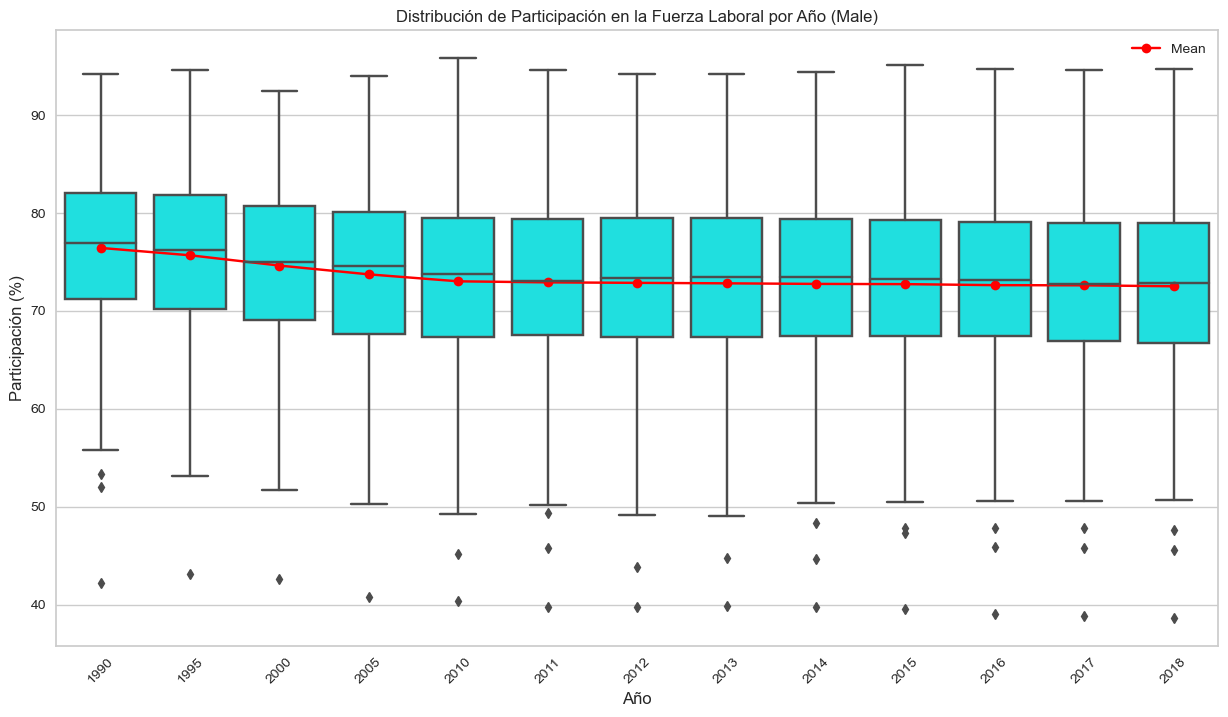

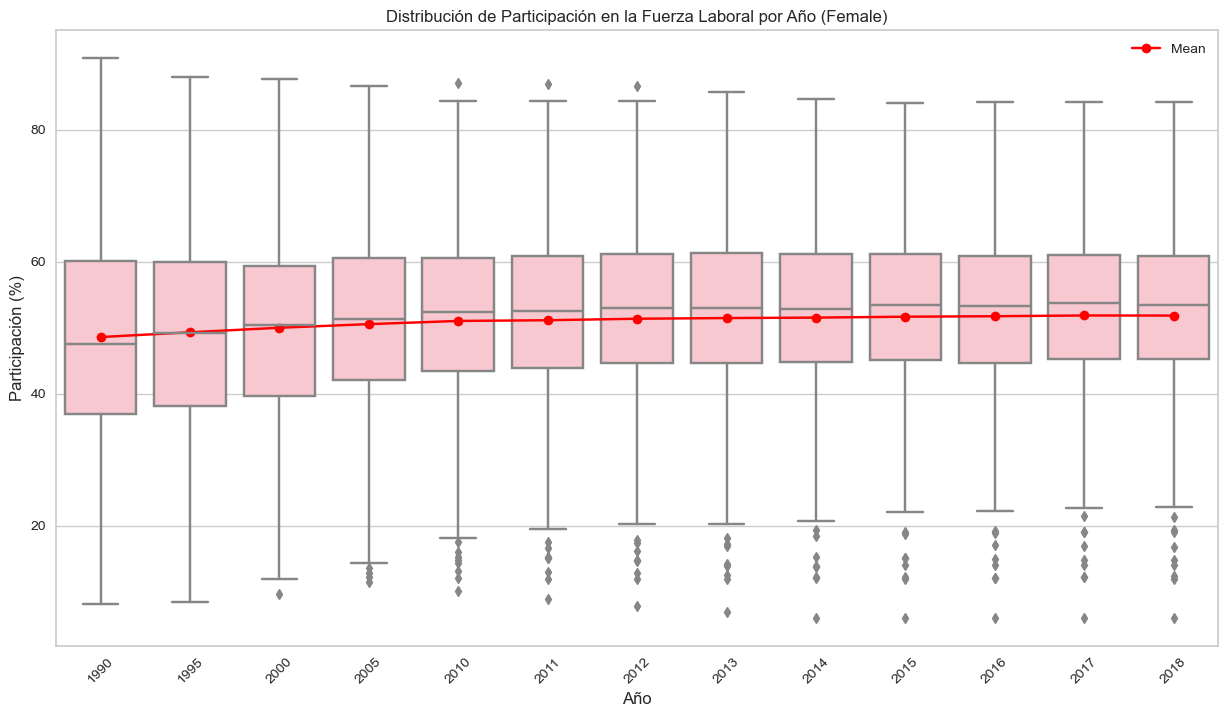

In [6]:
# Convertir los DataFrames a formato largo
male_long = male_cleaned.melt(id_vars="Country", var_name="Year", value_name="Participation")
female_long = female_cleaned.melt(id_vars="Country", var_name="Year", value_name="Participation")

# Graficar boxplot para hombres
plt.figure(figsize=(15, 8))
sns.boxplot(data=male_long, x="Year", y="Participation", color="cyan", showfliers=True)
male_mean = male_long.groupby("Year")["Participation"].mean()
plt.plot(male_mean.index, male_mean.values, marker="o", color="red", label="Mean")
plt.title("Distribución de Participación en la Fuerza Laboral por Año (Male)")
plt.xlabel("Año")
plt.ylabel("Participación (%)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Graficar boxplot para mujeres
plt.figure(figsize=(15, 8))
sns.boxplot(data=female_long, x="Year", y="Participation", color="pink", showfliers=True)
female_mean = female_long.groupby("Year")["Participation"].mean()
plt.plot(female_mean.index, female_mean.values, marker="o", color="red", label="Mean")
plt.title("Distribución de Participación en la Fuerza Laboral por Año (Female)")
plt.xlabel("Año")
plt.ylabel("Participación (%)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

### Tratamiento de valores atípicos 🚫

Durante el análisis exploratorio, se identificaron valores atípicos en las variables del dataset. Estos valores extremos pueden influir de manera significativa en los resultados de los algoritmos de clustering, ya que estos son susceptibles a las distancias y podrían sesgar la formación de los grupos.

Dado que los valores atípicos representaban menos del 10% del total de los datos, se decidió eliminarlos para garantizar un análisis más preciso y representativo. Esta decisión ayuda a minimizar el impacto de estos puntos extremos y a mejorar la coherencia de los clústeres resultantes.

Justificación:

Impacto en el clustering: Los valores atípicos pueden generar grupos artificiales o desviar los centroides de los clústeres, afectando la calidad del modelo.

Proporción manejable: Al ser menos del 10%, la eliminación no afecta significativamente la integridad de los datos.

Calidad del análisis: Esta medida asegura que los resultados reflejen mejor las tendencias generales del dataset, reduciendo sesgos.

In [7]:
def remove_outliers(df):
    numeric_cols = df.columns[1:]  # Excluye la columna 'Country'
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Aplicar eliminación de outliers
male_df = remove_outliers(male_cleaned)
female_df = remove_outliers(female_cleaned)

# Verificar los resultados
print(f"Filas originales (Male): {len(male_cleaned)}, sin outliers: {len(male_df)}")
print(f"Filas originales (Female): {len(female_cleaned)}, sin outliers: {len(female_df)}")

Filas originales (Male): 181, sin outliers: 177
Filas originales (Female): 181, sin outliers: 159


### Correlación de las variables

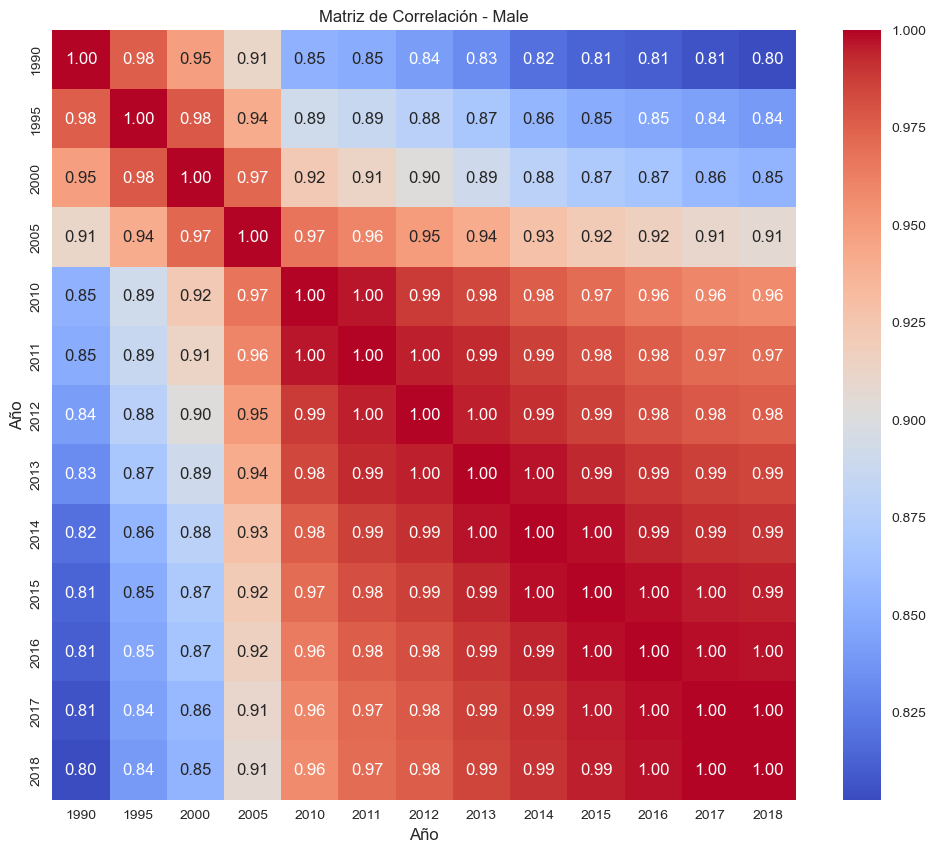

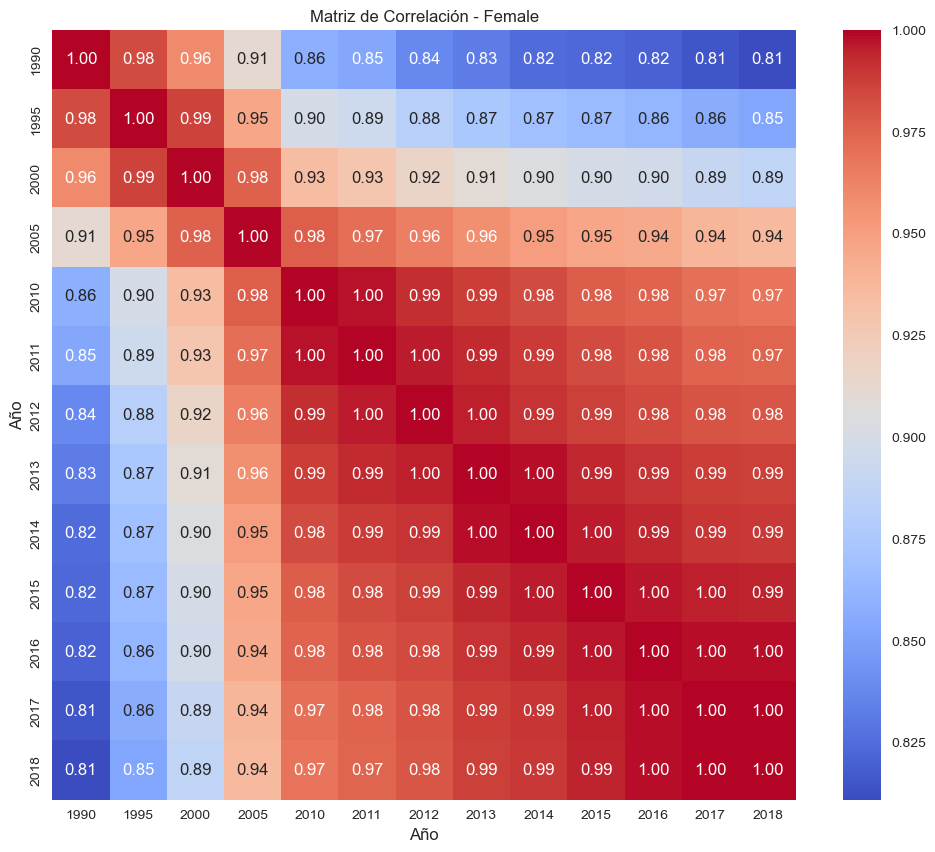

In [8]:
# Calcular las correlaciones para ambos DataFrames
male_corr = male_df.iloc[:, 1:].corr()  # Excluyendo 'Country'
female_corr = female_df.iloc[:, 1:].corr()  # Excluyendo 'Country'

# Graficar la matriz de correlación para los hombres
plt.figure(figsize=(12, 10))
sns.heatmap(male_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación - Male")
plt.xlabel("Año")
plt.ylabel("Año")
plt.show()

# Graficar la matriz de correlación para las mujeres
plt.figure(figsize=(12, 10))
sns.heatmap(female_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación - Female")
plt.xlabel("Año")
plt.ylabel("Año")
plt.show()


In [9]:
# Filtrar las columnas seleccionadas (1995, 2005, 2015)
male_selected = male_df[["Country", "1995", "2005", "2015"]]
female_selected = female_df[["Country", "1995", "2005", "2015"]]

# Renombrar columnas para distinguir género
male_selected.rename(columns={"1995": "1995_male", "2005": "2005_male", "2015": "2015_male"}, inplace=True)
female_selected.rename(columns={"1995": "1995_female", "2005": "2005_female", "2015": "2015_female"}, inplace=True)

# Combinar ambos DataFrames en uno solo
combined_df = pd.merge(male_selected, female_selected, on="Country")

# Verificar los datos combinados
# print("===== Datos Combinados =====")
# print(combined_df.head())
# Verificar las dimensiones
# print("\nDimensiones del DataFrame combinado:", combined_df.shape)

C:\Users\Camilo\AppData\Local\Temp\ipykernel_12368\3731540243.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_selected.rename(columns={"1995": "1995_male", "2005": "2005_male", "2015": "2015_male"}, inplace=True)
C:\Users\Camilo\AppData\Local\Temp\ipykernel_12368\3731540243.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_selected.rename(columns={"1995": "1995_female", "2005": "2005_female", "2015": "2015_female"}, inplace=True)


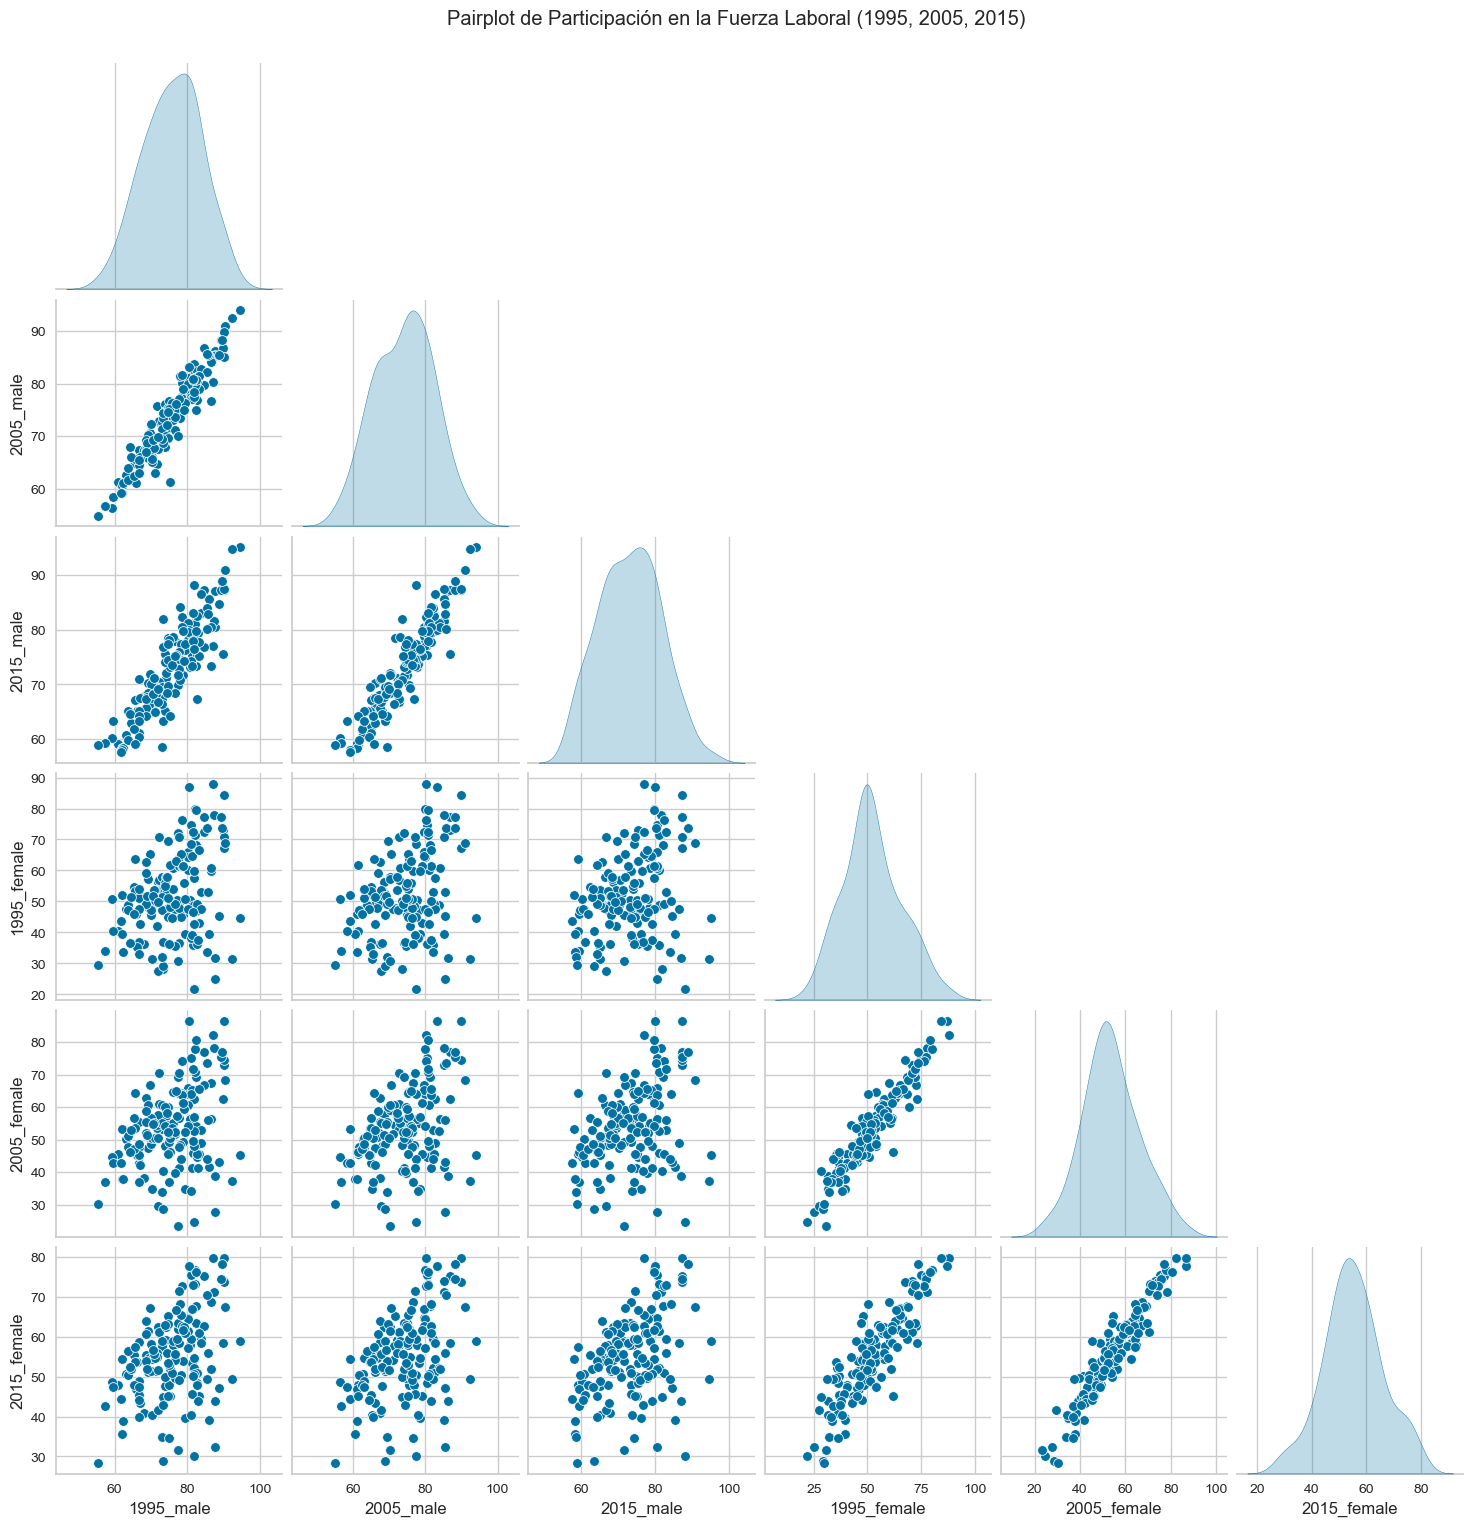

In [10]:
# Crear el pairplot con las columnas seleccionadas (excluyendo "Country")
sns.pairplot(combined_df.drop(columns=["Country"]), diag_kind="kde", corner=True)

# Mostrar el gráfico
plt.suptitle("Pairplot de Participación en la Fuerza Laboral (1995, 2005, 2015)", y=1.02)
plt.show()

## 3. Justificación de la selección de variables 📊

Para determinar las tres variables más representativas en el problema de clustering, se realizó un análisis detallado de las correlaciones temporales en los datos. Los principales hallazgos fueron:

1. **Alta correlación entre años consecutivos:**
   - Los años consecutivos presentan correlaciones muy altas (cercanas a 1.0), indicando que la participación en la fuerza laboral no cambió drásticamente entre estos períodos. Esto refleja una tendencia temporal suave sin fluctuaciones interanuales significativas.
   - Ejemplo: 
     - En la matriz de hombres, la correlación entre 2017 y 2018 es cercana a 0.99.
     - En la matriz de mujeres, la correlación entre 2010 y 2011 es también cercana a 0.99.

2. **Correlación decreciente con la diferencia temporal:**
   - La correlación entre años separados por períodos largos es menor, especialmente entre los primeros y últimos años de la serie (por ejemplo, 1990 frente a 2018). Esto sugiere un cambio gradual en la participación laboral a lo largo del tiempo.
   - Ejemplo:
     - En la matriz de hombres, la correlación entre 1990 y 2018 es 0.80.
     - En la matriz de mujeres, la correlación entre 1990 y 2018 es 0.81.

3. **Mayor variabilidad en los datos femeninos:**
   - Las correlaciones en la matriz de mujeres son ligeramente más bajas que en la de hombres, especialmente en años lejanos. Esto indica que la participación femenina ha sido más variable, posiblemente debido a factores sociales, culturales o económicos.
   - Ejemplo:
     - En la matriz de hombres, la correlación entre 1990 y 2010 es 0.85.
     - En la matriz de mujeres, la correlación entre 1990 y 2010 es 0.86, pero disminuyen más rápido en años más cercanos.

4. **Estabilidad en años recientes:**
   - Los años más recientes (2010 en adelante) muestran correlaciones extremadamente altas entre sí (cercanas a 1.0). Esto podría reflejar una estabilización en los patrones de participación laboral.

### Conclusión para el clustering:
Dado que los datos tienen correlaciones muy altas entre años consecutivos:
- Se decidió seleccionar años representativos con menor correlación entre ellos (por ejemplo, uno por década: 1995, 2005, 2015).
- Se evitó incluir años consecutivos, ya que aportan redundancia al análisis de clustering.

Características seleccionadas para clustering de hombres: Index(['2015_male', '2005_male', '1995_male'], dtype='object')


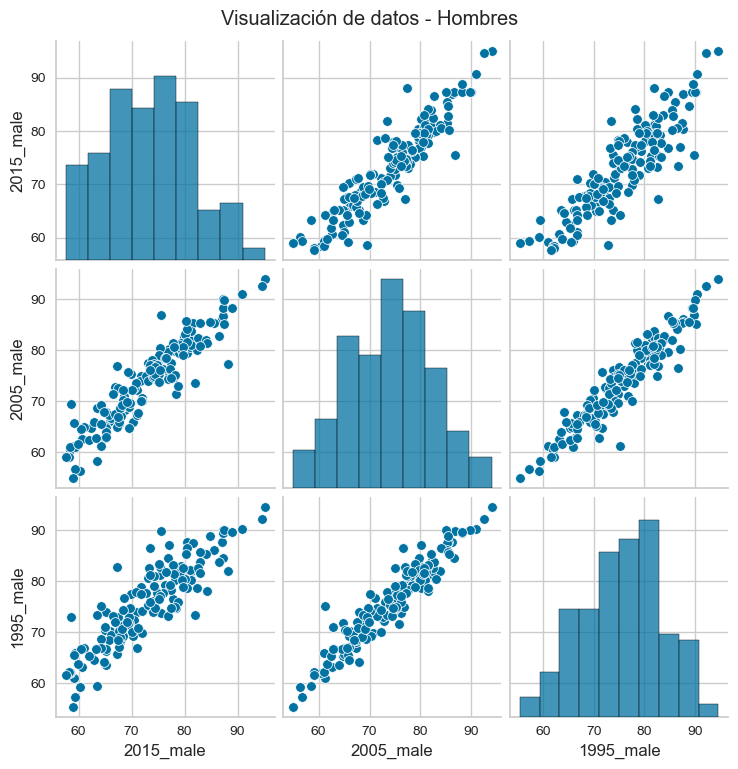

Características seleccionadas para clustering de mujeres: Index(['1995_female', '2005_female', '2015_female'], dtype='object')


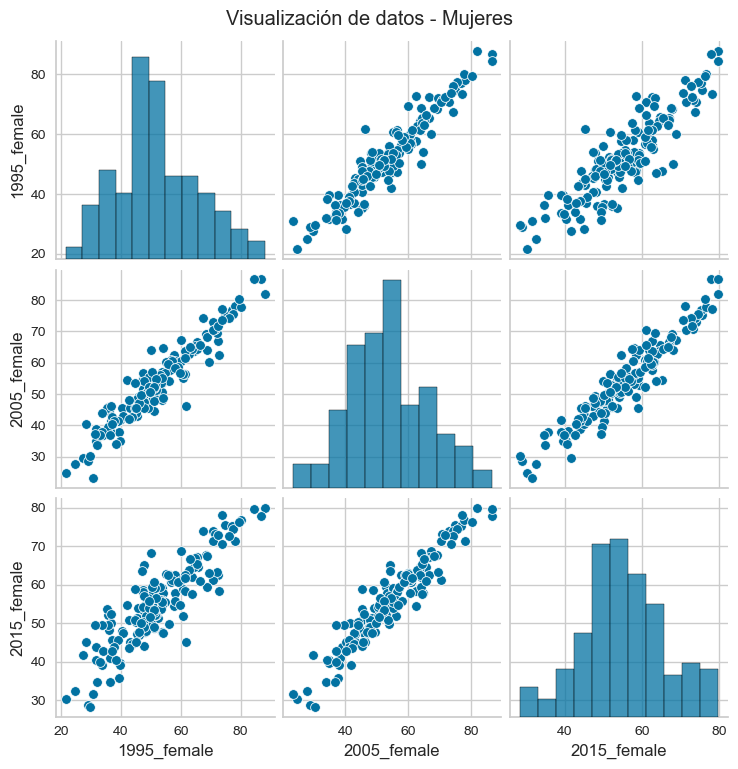

In [11]:
# Clustering para hombres
male_features = ["1995_male", "2005_male", "2015_male"]
male_data = combined_df[male_features]

# Seleccionar las tres variables con mayor varianza (ya son las únicas para hombres)
male_variances = male_data.var().sort_values(ascending=False)
male_selected_features = male_variances.index
print("Características seleccionadas para clustering de hombres:", male_selected_features)

# Visualización para hombres
sns.pairplot(male_data[male_selected_features])
plt.suptitle("Visualización de datos - Hombres", y=1.02)
plt.show()

# Clustering para mujeres
female_features = ["1995_female", "2005_female", "2015_female"]
female_data = combined_df[female_features]

# Seleccionar las tres variables con mayor varianza (ya son las únicas para mujeres)
female_variances = female_data.var().sort_values(ascending=False)
female_selected_features = female_variances.index
print("Características seleccionadas para clustering de mujeres:", female_selected_features)

# Visualización para mujeres
sns.pairplot(female_data[female_selected_features])
plt.suptitle("Visualización de datos - Mujeres", y=1.02)
plt.show()

## 4. Aproximación Inicial al Clustering 🔍

#### Implementación del algoritmo K-Means
En este análisis preliminar, se aplicó el algoritmo K-Means para explorar la agrupación inicial de los datos masculinos y femeninos utilizando 3 clústeres predefinidos. Las observaciones y los resultados se organizaron en función de los gráficos y los promedios de los clústeres.

#### Resultados Clustering de Hombres:
1. **Gráfico de dispersión:**
   - Los puntos se distribuyen en tres clústeres bien diferenciados en el gráfico de dispersión que utiliza las tasas de participación laboral masculina de 1995 y 2015.
   - La separación muestra diferencias claras en los niveles de participación laboral, reflejando patrones consistentes entre las dos décadas.
2. **Resumen de promedios por clúster:**
   - **Clúster 0:** Países con tasas consistentemente altas de participación laboral masculina (promedio de 84% en 1995 y 82% en 2015).
   - **Clúster 1:** Países con tasas más bajas, promediando un 66% en 1995 y un 64% en 2015.
   - **Clúster 2:** Países en un rango intermedio, con tasas promedio alrededor del 76% en 1995 y 73% en 2015.

#### Resultados Clustering de Mujeres:
1. **Gráfico de dispersión:**
   - Los puntos también se agrupan en tres clústeres distintos, utilizando las tasas de participación femenina de 1995 y 2015 como ejes.
   - La distribución evidencia mayor variabilidad en comparación con los datos masculinos, destacando diferencias significativas entre los clústeres.
2. **Resumen de promedios por clúster:**
   - **Clúster 0:** Países con tasas bajas de participación femenina (promedio de 35% en 1995 y 42% en 2015).
   - **Clúster 1:** Países con tasas moderadas, promediando un 51% en 1995 y un 55% en 2015.
   - **Clúster 2:** Países con tasas altas, promediando un 71% en 1995 y descendiendo levemente a 68% en 2015.

### Observaciones Generales:
- Los datos muestran una clara segmentación en la participación laboral tanto para hombres como para mujeres, lo que valida la eficacia inicial del algoritmo K-Means.
- La variabilidad en las tasas de participación femenina es más notable, reflejando posiblemente cambios sociales o culturales más significativos en algunos países.
- Los clústeres obtenidos proporcionan una base sólida para el análisis posterior y permiten identificar diferencias clave en las tendencias laborales entre géneros y a lo largo del tiempo.

c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Camilo\AppData\Local\Temp\ipykernel_12368\1304144028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['Cluster'] = kmeans_male.fit_predict(male_data)


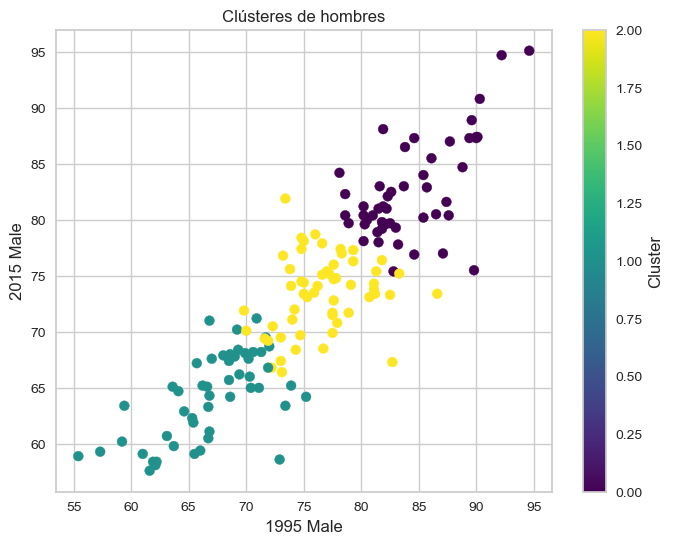

c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Camilo\AppData\Local\Temp\ipykernel_12368\1304144028.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['Cluster'] = kmeans_female.fit_predict(female_data)


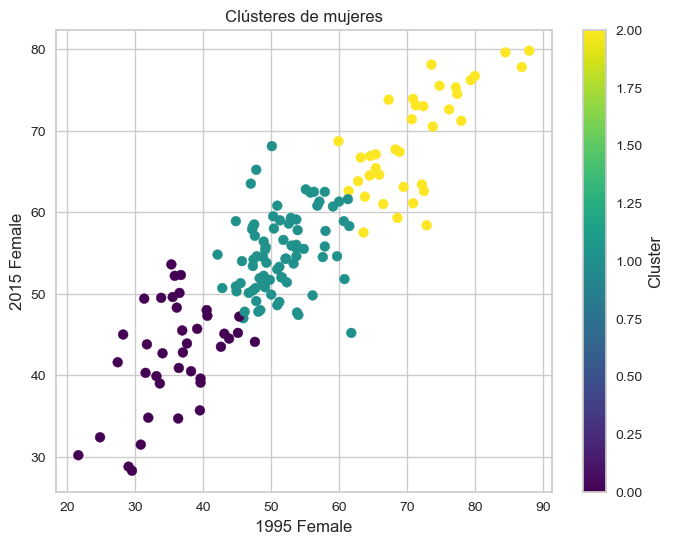

In [12]:
# KMeans para hombres
kmeans_male = KMeans(n_clusters=3, random_state=42)
male_data['Cluster'] = kmeans_male.fit_predict(male_data)

# Visualización de clústeres para hombres
plt.figure(figsize=(8, 6))
plt.scatter(male_data['1995_male'], male_data['2015_male'], c=male_data['Cluster'], cmap='viridis', s=50)
plt.title("Clústeres de hombres")
plt.xlabel("1995 Male")
plt.ylabel("2015 Male")
plt.colorbar(label="Cluster")
plt.show()

# KMeans para mujeres
kmeans_female = KMeans(n_clusters=3, random_state=42)
female_data['Cluster'] = kmeans_female.fit_predict(female_data)

# Visualización de clústeres para mujeres
plt.figure(figsize=(8, 6))
plt.scatter(female_data['1995_female'], female_data['2015_female'], c=female_data['Cluster'], cmap='viridis', s=50)
plt.title("Clústeres de mujeres")
plt.xlabel("1995 Female")
plt.ylabel("2015 Female")
plt.colorbar(label="Cluster")
plt.show()

===== Resumen de Clústeres (Hombres) =====
         1995_male  2005_male  2015_male
Cluster                                 
0        84.308163  83.353061  82.546939
1        66.970588  64.696078  64.237255
2        76.637500  74.558929  73.396429

===== Resumen de Clústeres (Mujeres) =====
         1995_female  2005_female  2015_female
Cluster                                       
0          35.817949    38.738462    42.476923
1          51.512500    53.220000    55.018750
2          71.167568    70.670270    68.829730


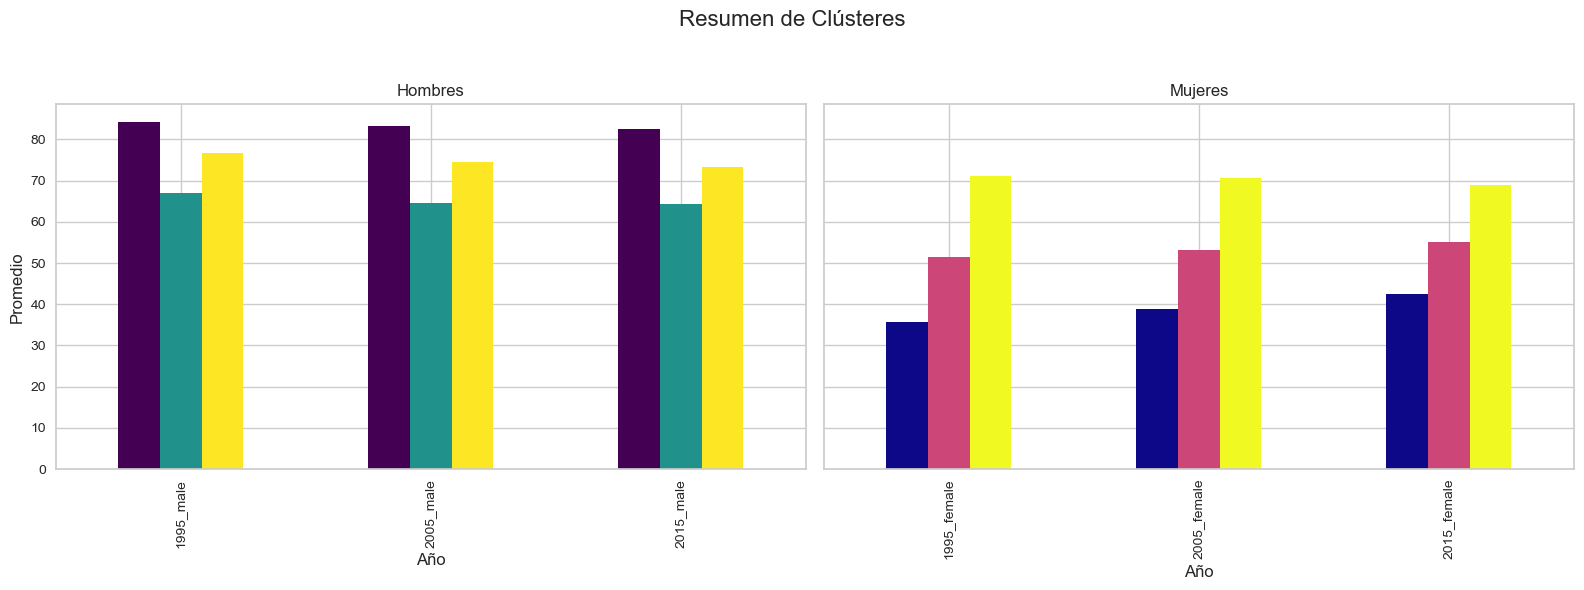

In [13]:
# Resumen de clústeres para hombres
male_cluster_summary = male_data.groupby('Cluster')[['1995_male', '2005_male', '2015_male']].mean()
print("===== Resumen de Clústeres (Hombres) =====")
print(male_cluster_summary)

# Resumen de clústeres para mujeres
female_cluster_summary = female_data.groupby('Cluster')[['1995_female', '2005_female', '2015_female']].mean()
print("\n===== Resumen de Clústeres (Mujeres) =====")
print(female_cluster_summary)

# Visualización de los resúmenes en subplots
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Resumen de Clústeres', fontsize=16)

# Resumen para hombres
male_cluster_summary.T.plot(kind='bar', ax=axes[0], colormap='viridis', legend=False)
axes[0].set_title("Hombres")
axes[0].set_ylabel("Promedio")
axes[0].set_xlabel("Año")

# Resumen para mujeres
female_cluster_summary.T.plot(kind='bar', ax=axes[1], colormap='plasma', legend=False)
axes[1].set_title("Mujeres")
axes[1].set_xlabel("Año")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## 5. Selección del número óptimo de clústeres 📊

Para determinar el número adecuado de clústeres en los datos, se utilizaron los siguientes métodos:

1. **Método del codo:** Este enfoque evalúa la inercia (suma de las distancias al cuadrado dentro de los clústeres) en función del número de clústeres. Se busca el punto donde la reducción de la inercia empieza a estabilizarse, indicando un equilibrio entre complejidad y ajuste.

2. **Análisis de la silueta:** Este método mide qué tan bien están separados los clústeres entre sí y qué tan compactos son. Se seleccionó el número de clústeres que maximizó el coeficiente de silueta promedio.

3. **Estadístico GAP:** Compara la inercia observada con la esperada bajo una distribución aleatoria. El número óptimo de clústeres corresponde al valor donde el GAP es máximo, señalando una buena separación de clústeres respecto a datos aleatorios.

## Método del Codo

Curva de Codo - Hombres


c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

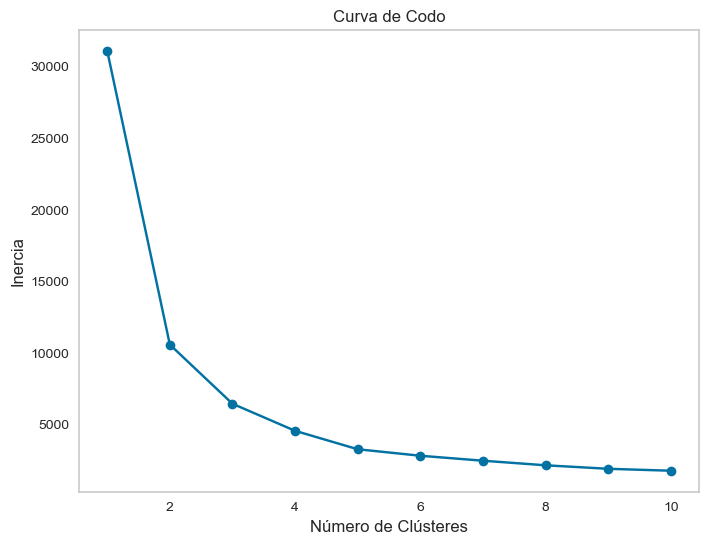

Curva de Codo - Mujeres


c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

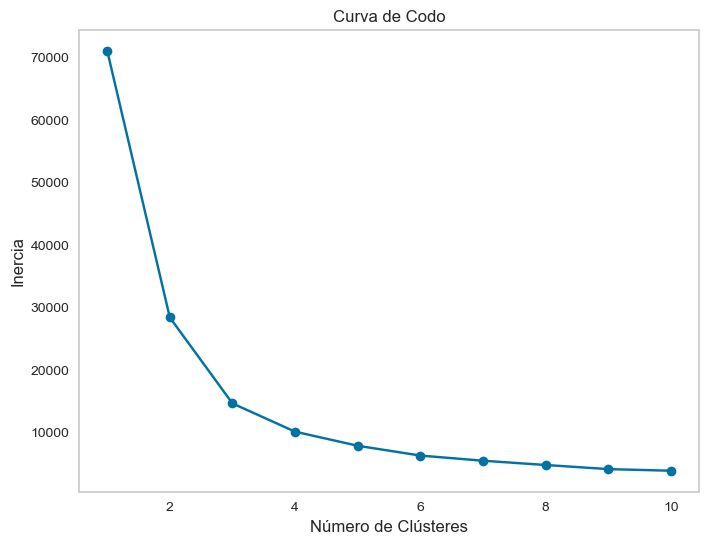

In [14]:
# Curva de codo para determinar la cantidad óptima de clústeres
def elbow_method(data, max_clusters=10):
    from sklearn.cluster import KMeans
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title("Curva de Codo")
    plt.xlabel("Número de Clústeres")
    plt.ylabel("Inercia")
    plt.grid()
    plt.show()

# Aplicar a los datos de hombres
print("Curva de Codo - Hombres")
elbow_method(male_data.drop(columns=['Cluster']))

# Aplicar a los datos de mujeres
print("Curva de Codo - Mujeres")
elbow_method(female_data.drop(columns=['Cluster']))

## Análisis de silueta

Análisis de Silueta - Hombres


c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

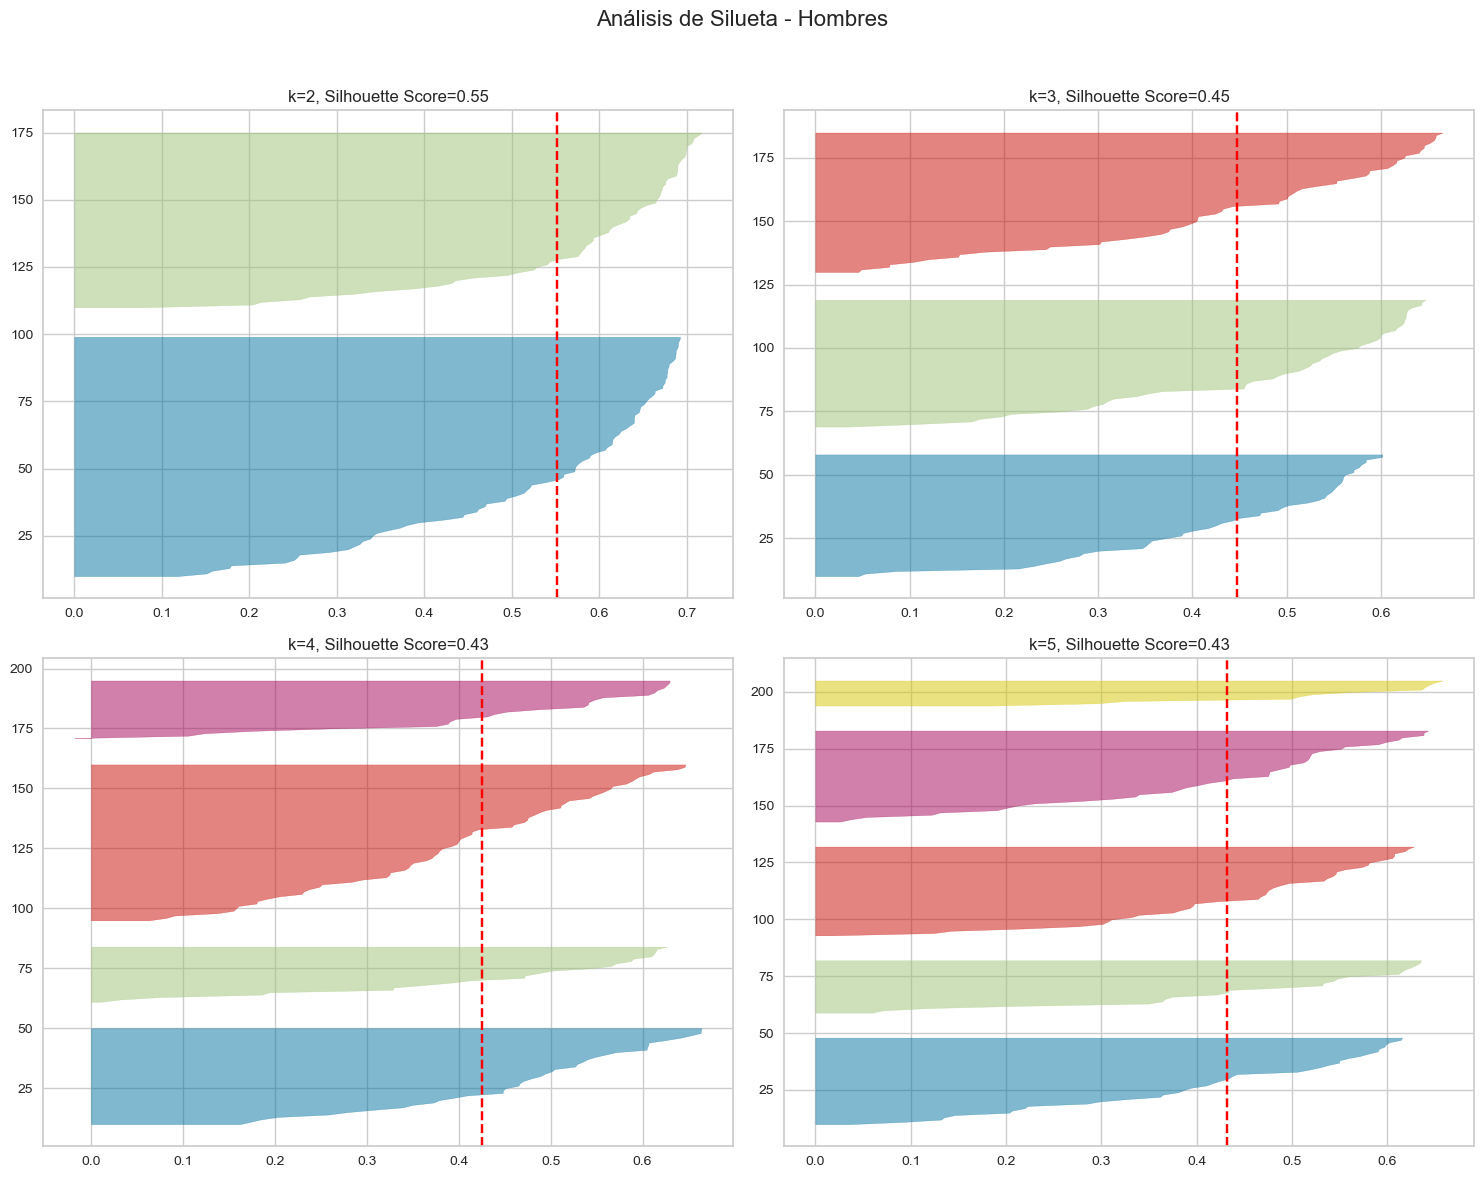

Análisis de Silueta - Mujeres


c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

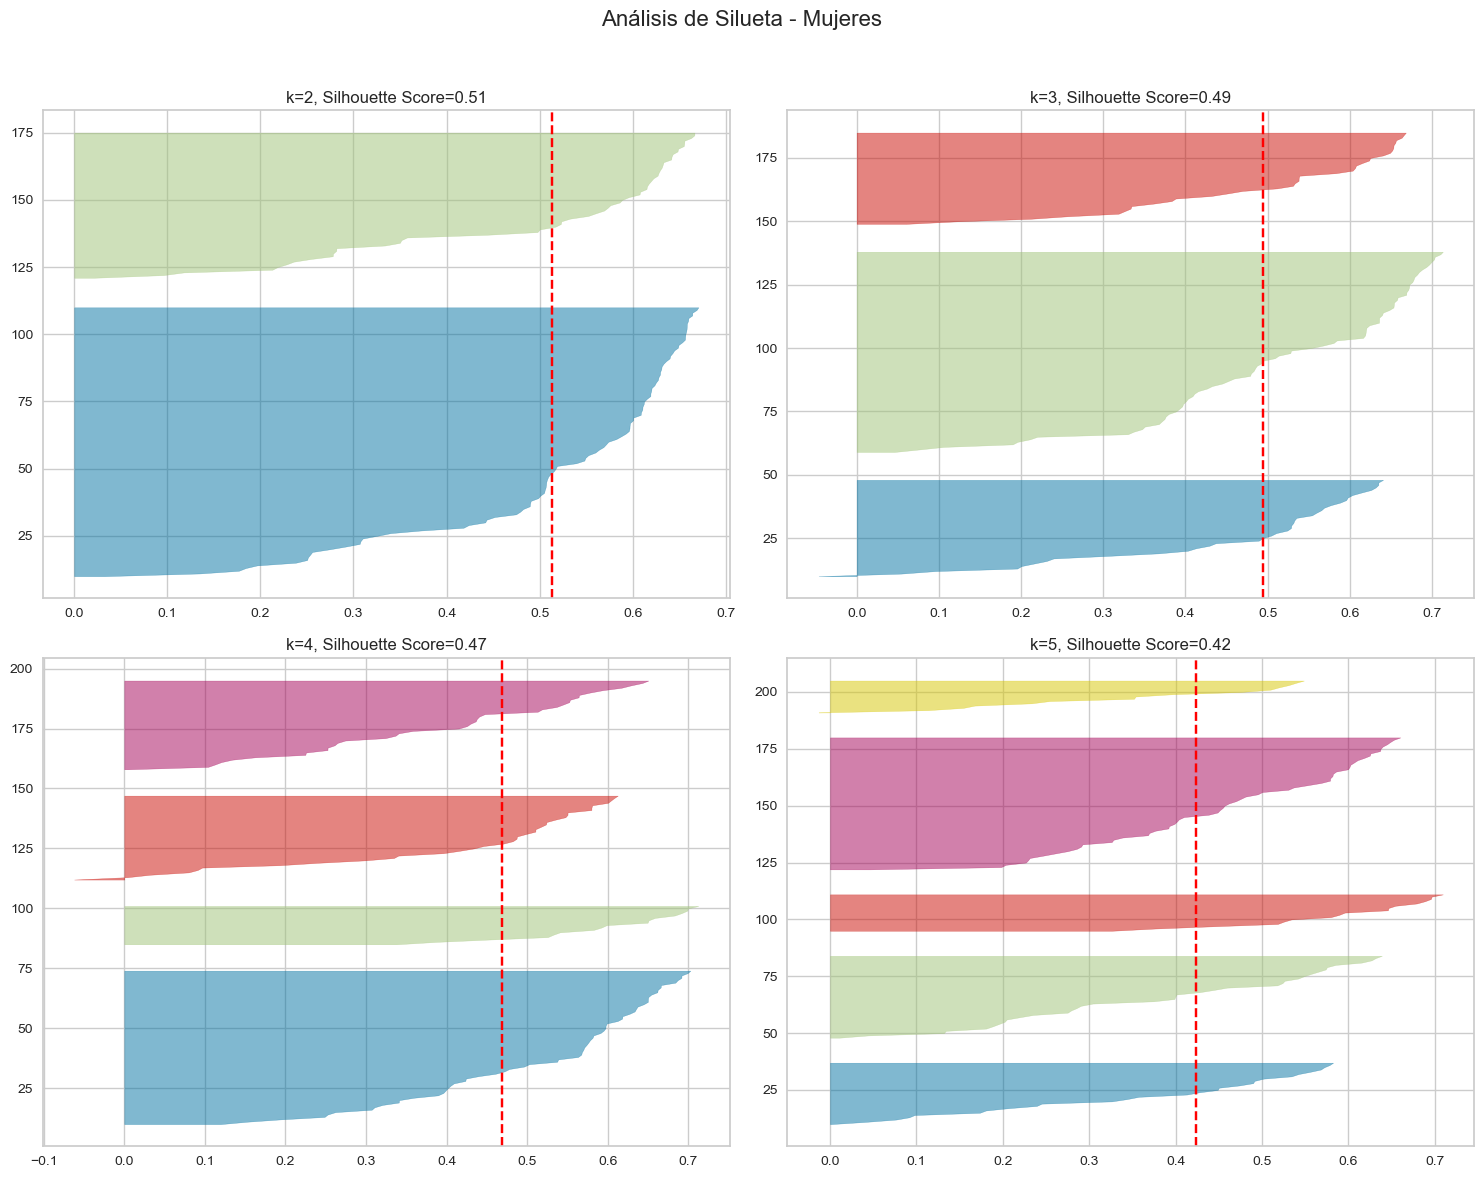

In [15]:
# Función para realizar análisis de silueta con subplots
def silhouette_with_subplots(data, title):
    fig, ax = plt.subplots(2, 2, figsize=(15, 12))
    for i, k in enumerate([2, 3, 4, 5]):
        model = KMeans(n_clusters=k, random_state=42)
        q, mod = divmod(i, 2)
        visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[q][mod])
        visualizer.fit(data)
        silhouette_avg = visualizer.silhouette_score_
        ax[q][mod].set_title(f'k={k}, Silhouette Score={silhouette_avg:.2f}')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Análisis de silueta para hombres
print("Análisis de Silueta - Hombres")
silhouette_with_subplots(male_data.drop(columns=['Cluster']), "Análisis de Silueta - Hombres")

# Análisis de silueta para mujeres
print("Análisis de Silueta - Mujeres")
silhouette_with_subplots(female_data.drop(columns=['Cluster']), "Análisis de Silueta - Mujeres")

## Estádistico de GAP

Estadístico de Gap - Hombres


c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

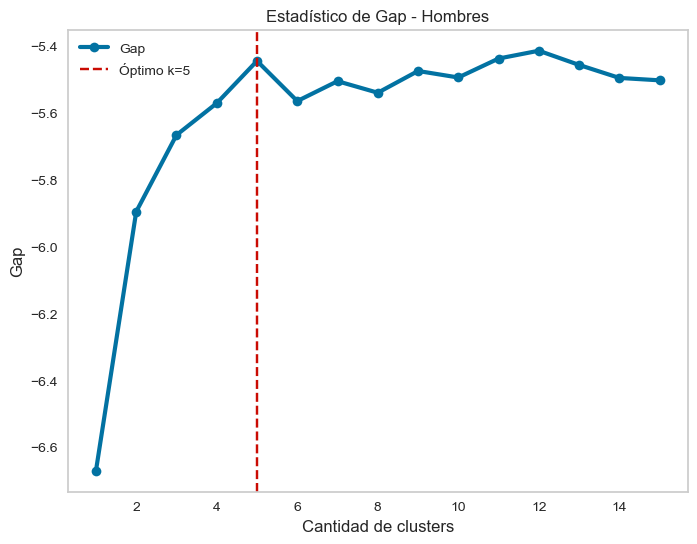

Número óptimo de clústeres para hombres: 5
Estadístico de Gap - Mujeres


c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

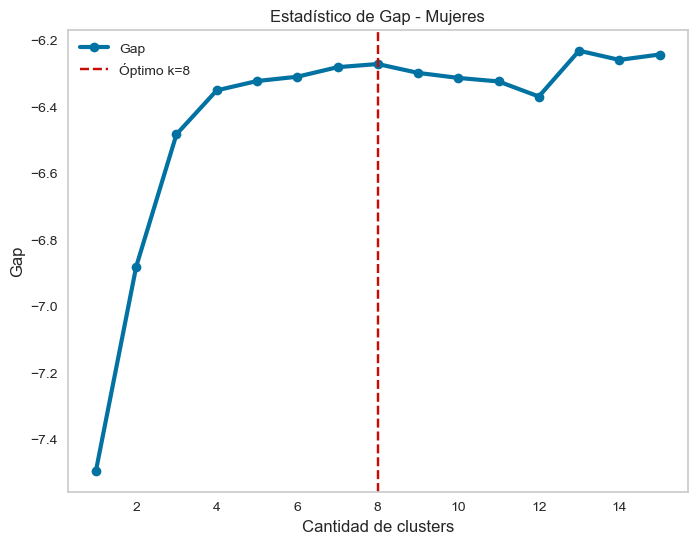

Número óptimo de clústeres para mujeres: 8


In [16]:
# Función para calcular el estadístico de gap
def GAPstatistic(data, maxClusters=15, nrefs=3, title="Estadístico de Gap"):
    gaps = np.zeros((maxClusters,))
    results = {'clusterCount': [], 'gap': []}
    
    for gap_index, k in enumerate(range(1, maxClusters + 1)):
        # Dispersión para datos de referencia
        refDisps = np.zeros(nrefs)
        for i in range(nrefs):
            # Generar conjunto aleatorio de referencia
            np.random.seed(i)
            randomReference = np.random.random_sample(size=data.shape)
            
            # Ajustar modelo KMeans al conjunto de referencia
            km = KMeans(n_clusters=k, n_init="auto", random_state=42)
            km.fit(randomReference)
            refDisps[i] = km.inertia_
        
        # Ajustar modelo KMeans a los datos originales
        km = KMeans(n_clusters=k, n_init="auto", random_state=42)
        km.fit(data)
        origDisp = km.inertia_
        
        # Calcular el estadístico de gap
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gaps[gap_index] = gap
        results['clusterCount'].append(k)
        results['gap'].append(gap)
    
    # Determinar el número óptimo de clústeres (primer máximo)
    optK = 0
    for i in range(len(gaps) - 1):
        if gaps[i + 1] <= gaps[i]:
            optK = i + 1
            break
    
    # Graficar el estadístico de gap
    plt.figure(figsize=(8, 6))
    plt.plot(results['clusterCount'], results['gap'], linewidth=3, marker='o', label='Gap')
    plt.axvline(x=optK, color='r', linestyle='--', label=f'Óptimo k={optK}')
    plt.xlabel('Cantidad de clusters')
    plt.ylabel('Gap')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

    return optK

# Aplicar el estadístico de gap a los datos de hombres
print("Estadístico de Gap - Hombres")
optimal_k_male = GAPstatistic(male_data.drop(columns=['Cluster']), title="Estadístico de Gap - Hombres")
print(f"Número óptimo de clústeres para hombres: {optimal_k_male}")

# Aplicar el estadístico de gap a los datos de mujeres
print("Estadístico de Gap - Mujeres")
optimal_k_female = GAPstatistic(female_data.drop(columns=['Cluster']), title="Estadístico de Gap - Mujeres")
print(f"Número óptimo de clústeres para mujeres: {optimal_k_female}")

**Observaciones:**

Según el **método del codo**, el número óptimo de clústeres fue 3, ya que este punto mostró la primera estabilización en la disminución de la inercia.

En el **análisis de la silueta**, el número óptimo fue también 3, respaldando la decisión.

El **estadístico GAP** alcanzó su valor máximo con 3 clústeres para los hombres y 8 clústeres para las mujeres. Sin embargo, como se observó en las pruebas previas, al aumentar el número de clústeres por encima de 3, los grupos tienden a volverse más desiguales y menos consistentes.

## 6. Clustering Jerárquico 🌳

#### Implementación del Análisis Jerárquico
Se llevó a cabo un análisis jerárquico para complementar el enfoque de clustering basado en K-Means. Este método permite observar cómo se agrupan los datos en diferentes niveles de granularidad, ofreciendo una representación visual clara a través de dendogramas.

#### Procedimiento:
1. **Cálculo de distancias:**
   - Se utilizó el método de enlace completo (*complete linkage*) para calcular las distancias entre los clústeres, maximizando la distancia entre los puntos más alejados en cada grupo.
   - La métrica de distancia utilizada fue la euclidiana.

2. **Generación de dendogramas:**
   - Se generaron dendogramas para los datos de hombres y mujeres, mostrando la estructura jerárquica de los grupos.
   - La línea de corte se estableció a una distancia óptima para obtener **3 clústeres**, consistente con los resultados de K-Means.

3. **Asignación de clústeres:**
   - Los datos fueron asignados a los clústeres resultantes del corte en el dendograma.
   - Se graficaron los clústeres resultantes en un gráfico de dispersión, utilizando las tasas de participación de 1995 y 2015 como ejes.

#### Resultados del Clustering Jerárquico:
##### Dendogramas:
- **Hombres:** El dendograma mostró una estructura clara con tres grupos principales. La línea de corte evidencia una separación consistente con los clústeres identificados previamente.
- **Mujeres:** En el dendograma de mujeres, la segmentación fue igualmente clara, destacando diferencias más marcadas en los niveles de participación laboral.

##### Gráficos de dispersión:
- Los gráficos de dispersión de los clústeres jerárquicos reflejan una segmentación similar a la obtenida por K-Means, validando la consistencia entre los métodos.
- Para los hombres, los clústeres están organizados principalmente por niveles de participación altos, medios y bajos en ambos años.
- Para las mujeres, los clústeres evidencian una mayor variabilidad en las tasas de participación.

#### Observaciones:
- El clustering jerárquico reafirma los resultados obtenidos previamente, ofreciendo además una visión más detallada sobre cómo se forman los grupos en distintos niveles.
- Las diferencias de género son notables, con los datos femeninos mostrando una mayor diversidad en las tasas de participación laboral.
- Este método proporciona una herramienta complementaria para validar y enriquecer las conclusiones del análisis de clustering.



Agrupamiento Jerárquico - Hombres


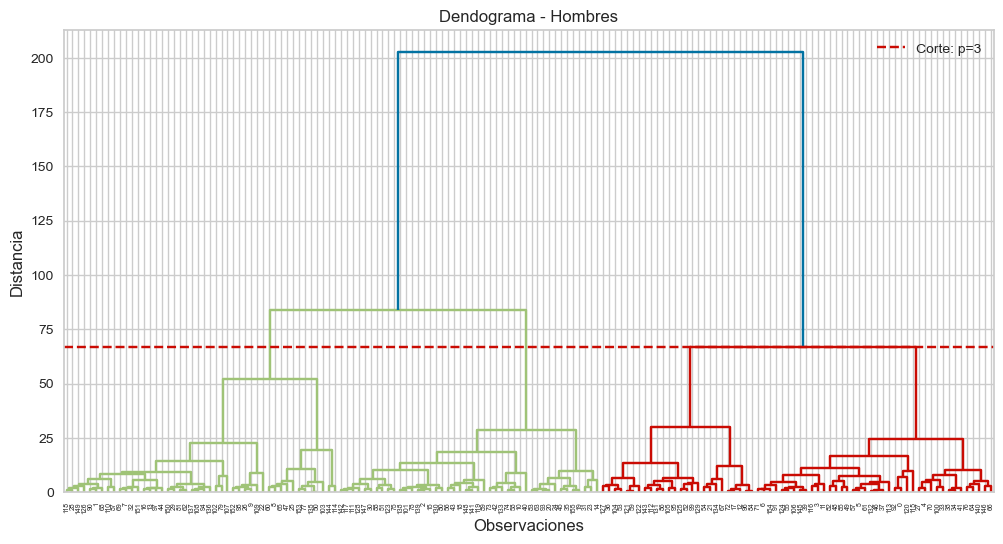

C:\Users\Camilo\AppData\Local\Temp\ipykernel_12368\2327280216.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['Hierarchical_Cluster'] = hierarchical_clustering(male_data.drop(columns=['Cluster']), "Hombres", p=3)


Agrupamiento Jerárquico - Mujeres


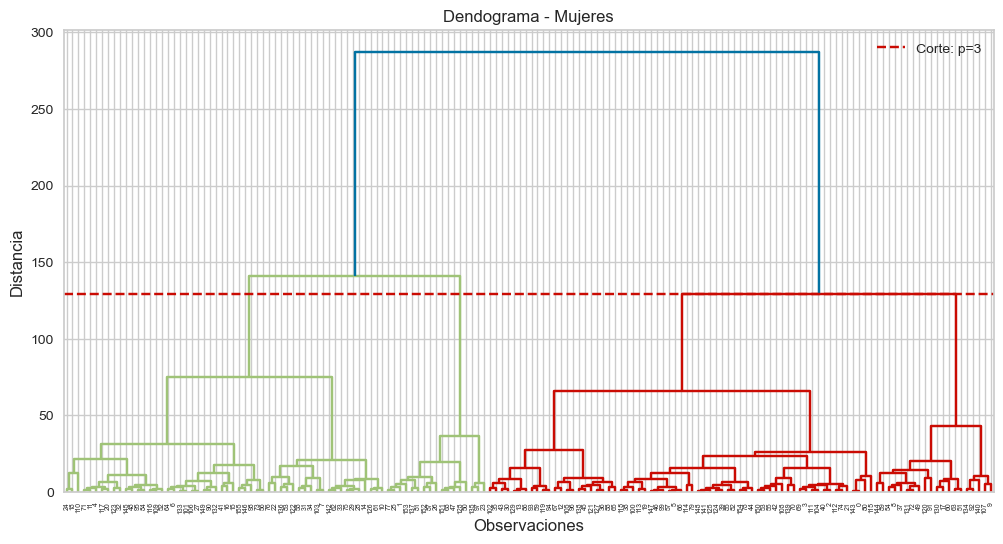

C:\Users\Camilo\AppData\Local\Temp\ipykernel_12368\2327280216.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['Hierarchical_Cluster'] = hierarchical_clustering(female_data.drop(columns=['Cluster']), "Mujeres", p=3)


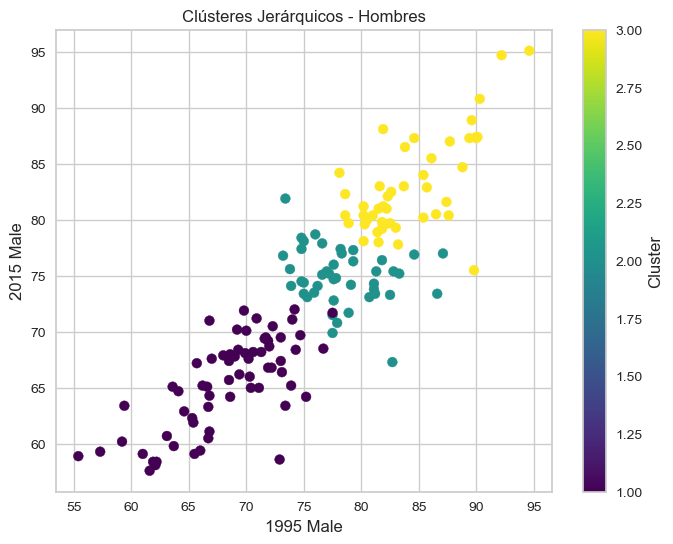

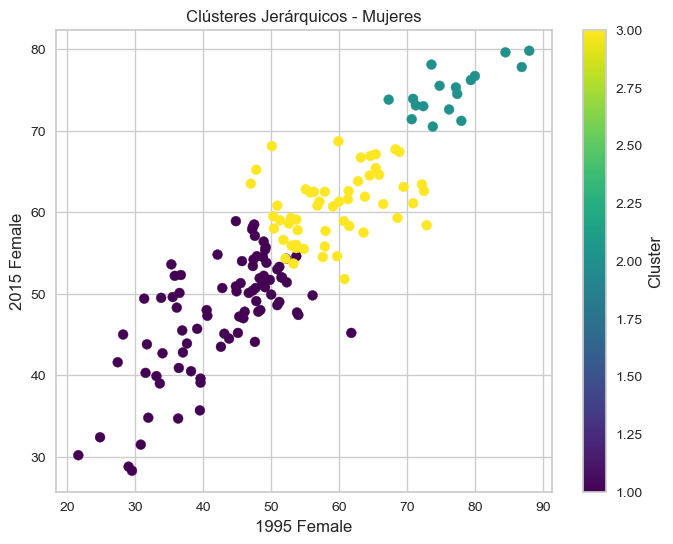

In [17]:
# Función para generar dendograma y asignar clústeres con p=3
def hierarchical_clustering(data, title, p=3):
    # Generar el linkage
    linked = linkage(data, method='ward')
    
    # Generar dendograma
    plt.figure(figsize=(12, 6))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f"Dendograma - {title}")
    plt.xlabel("Observaciones")
    plt.ylabel("Distancia")
    plt.axhline(y=linked[-p, 2], color='r', linestyle='--', label=f'Corte: p={p}')
    plt.legend()
    plt.show()
    
    # Asignar clústeres
    clusters = fcluster(linked, t=p, criterion='maxclust')
    return clusters

# Agrupamiento jerárquico para hombres
print("Agrupamiento Jerárquico - Hombres")
male_data['Hierarchical_Cluster'] = hierarchical_clustering(male_data.drop(columns=['Cluster']), "Hombres", p=3)

# Agrupamiento jerárquico para mujeres
print("Agrupamiento Jerárquico - Mujeres")
female_data['Hierarchical_Cluster'] = hierarchical_clustering(female_data.drop(columns=['Cluster']), "Mujeres", p=3)

# Visualización de los clústeres jerárquicos para hombres
plt.figure(figsize=(8, 6))
plt.scatter(male_data['1995_male'], male_data['2015_male'], c=male_data['Hierarchical_Cluster'], cmap='viridis', s=50)
plt.title("Clústeres Jerárquicos - Hombres")
plt.xlabel("1995 Male")
plt.ylabel("2015 Male")
plt.colorbar(label="Cluster")
plt.show()

# Visualización de los clústeres jerárquicos para mujeres
plt.figure(figsize=(8, 6))
plt.scatter(female_data['1995_female'], female_data['2015_female'], c=female_data['Hierarchical_Cluster'], cmap='viridis', s=50)
plt.title("Clústeres Jerárquicos - Mujeres")
plt.xlabel("1995 Female")
plt.ylabel("2015 Female")
plt.colorbar(label="Cluster")
plt.show()

## 7. Conclusiones 📋

#### Análisis General
El análisis de clustering aplicado a los datos de participación laboral masculina y femenina permitió identificar patrones significativos y segmentar los datos en grupos representativos. Las siguientes conclusiones se destacan a partir del estudio:

1. **Segmentación efectiva:** Tanto K-Means como el clustering jerárquico identificaron tres clústeres principales para los hombres y las mujeres, reflejando patrones consistentes de participación laboral en diferentes niveles (bajo, medio y alto).

2. **Diferencias entre géneros:**
   - Los datos femeninos mostraron mayor variabilidad entre los clústeres, lo que sugiere una evolución más dinámica en la participación laboral femenina a lo largo del tiempo.
   - Los clústeres masculinos fueron más compactos y homogéneos, reflejando una estabilidad relativa en las tasas de participación laboral.

3. **Validación cruzada:** Los resultados obtenidos por ambos métodos (K-Means y clustering jerárquico) fueron consistentes, validando la solidez de las conclusiones.

#### Comparación entre K-Means y Clustering Jerárquico
- **K-Means:**
  - Más adecuado para manejar grandes volúmenes de datos, debido a su menor complejidad computacional.
  - Los centroides de los clústeres proporcionaron un punto de referencia claro para interpretar los resultados.
  - Sin embargo, requiere definir el número de clústeres de antemano, lo que puede influir en la segmentación.

- **Clustering Jerárquico:**
  - Permite observar la estructura jerárquica de los datos a través de dendogramas, lo que ofrece una perspectiva más detallada sobre cómo se forman los clústeres.
  - No requiere un número inicial de clústeres, aunque se debe seleccionar un punto de corte para segmentar los datos.
  - Es más susceptible a la complejidad computacional en conjuntos de datos grandes.

#### Reflexión Final
El enfoque combinado de ambos métodos permitió obtener una visión más completa y robusta de los patrones en la participación laboral. Aunque el clustering jerárquico aporta una comprensión más detallada de las relaciones entre los datos, K-Means se mantiene como una herramienta práctica y eficiente para este tipo de análisis. Ambos métodos destacaron diferencias significativas entre los patrones de participación laboral masculina y femenina, resaltando la importancia de abordar estas diferencias en el diseño de políticas laborales.
